In [1]:
import numpy as np
import operator
from os import listdir

In [20]:
def createDataSet():
    #四组数据，每组数据含两个特征值
    group = np.array([
                    [1.1,1.1],
                    [1.0,1.0],
                    [0,0],
                    [0,0.1]
                    ])
    #group数据对应标签信息，大小与group行数相同
    labels = ['A','A','B','B']
    return group,labels

In [21]:
group,labels = createDataSet()

In [22]:
group

array([[1.1, 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [23]:
labels

['A', 'A', 'B', 'B']

\begin{equation}
distance=\sqrt{(x1-x2)^{2}+(y1-y2){^2}}
\end{equation}

In [24]:
'''
inX: 待预测的输入向量
dataSet: 样本训练集
labels: 标签向量
k: 最近邻居个数
'''
def classify0(inX, dataSet,labels,k):
    '''
    step1: 计算输入向量inX与所有样本点的欧式距离
    '''
    dataSetSize = dataSet.shape[0]
    #print(np.tile(inX,(dataSetSize,1)))
    #行向重复1次，列向重复dataSetSize次，扩展得到新矩阵与原矩阵相减
    diffMat = np.tile(inX,(dataSetSize,1)) - dataSet
    #print(diffMat)
    sqDiffMat = diffMat**2
    print(sqDiffMat)
    #平方再求和，sum(axis=0)-->行相加，sum(1)-->列相加
    sqDistances = sqDiffMat.sum(axis=1)
    #print("sqDistances:", sqDistances)

    # 再开方，得到与样本集所有元素的欧式距离
    distances = sqDistances**0.5
    #print("distances:",distances)

    #distances保存测试向量与样本集所有元素欧式距离，返回排序后的索引值
    sortedDistIndicies = distances.argsort()
    #print("sortedDistIndicies:", sortedDistIndicies)

    
    '''
    step2:选择距离最小的k个点
    '''
    classCount={}
    for i in range(k):
        #按序取出前k个元素的类别
        voteIlabel = labels[sortedDistIndicies[i]]
        #dict.get(key,dafault=None)字典返回指定key的值，若不存在，创建一个新键值
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1

    '''
    step3:选出k个点里，出现频率最高的类别
    '''
    #print('classCount:',classCount)
    #classCount.items():将字典分解为元祖列表
    # key=operator.itemgetter(1)根据字典的值进行排序
    # key=operator.itemgetter(0)根据字典的键进行排序
    # reverse降序排序字典
    print(classCount)
    print(classCount.items())
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    #print('sortedClassCount:', sortedClassCount)
    
    #返回预测的类别
    return sortedClassCount[0][0]

In [25]:
classify0([0,0],group,labels,3)

[[1.21 1.21]
 [1.   1.  ]
 [0.   0.  ]
 [0.   0.01]]
{'B': 2, 'A': 1}
dict_items([('B', 2), ('A', 1)])


'B'

In [26]:
def file2matrix(filename):
    '''
    step1: 得到文件行数
    '''
    fr = open(filename)
    arrayOfLines = fr.readlines() #读取所有内容
    #得到文件内容行数
    numberOFLines = len(arrayOfLines)

    '''
    step2: 创建返回的NumPy矩阵
    '''
    #分别是解析数据的矩阵和分类标签向量
    returnMat = np.zeros((numberOFLines, 3))
    # print('numberOFLines:', numberOFLines)
    classLabelVector = []

    '''
    step3: 解析文件内容到列表
    '''
    index = 0
    for line in arrayOfLines:
        line = line.strip() #参数为空时，默认删除空白符('\n','\t','\r',' ')
        #对字符串line根据'\t'进行切片
        listFromLine = line.split('\t')
        #print(listFromLine)
        #提取前n-1列，存放到returnMat特征矩阵中
        returnMat[index, :] = listFromLine[0:-1]

        classLabelVector.append(int(listFromLine[-1]))
        index += 1

    return returnMat,classLabelVector

In [27]:
datingDateMat,datingLabels=file2matrix('./datingTestSet2.txt')


In [28]:
datingDateMat,datingLabels

(array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
        [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
        [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
        ...,
        [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
        [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
        [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]]),
 [3,
  2,
  1,
  1,
  1,
  1,
  3,
  3,
  1,
  3,
  1,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  2,
  3,
  2,
  1,
  2,
  3,
  2,
  3,
  2,
  3,
  2,
  1,
  3,
  1,
  3,
  1,
  2,
  1,
  1,
  2,
  3,
  3,
  1,
  2,
  3,
  3,
  3,
  1,
  1,
  1,
  1,
  2,
  2,
  1,
  3,
  2,
  2,
  2,
  2,
  3,
  1,
  2,
  1,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  3,
  1,
  2,
  3,
  2,
  2,
  1,
  3,
  1,
  1,
  3,
  3,
  1,
  2,
  3,
  1,
  3,
  1,
  2,
  2,
  1,
  1,
  3,
  3,
  1,
  2,
  1,
  3,
  3,
  2,
  1,
  1,
  3,
  1,
  2,
  3,
  3,
  2,
  3,
  3,
  1,
  2,
  3,
  2,
  1,
  3,
  1,
  2,
  1,
  1,
  2,
  3,
  2,
  3,
  2,
  3,
  2,
  1,
  3,
  3,
  3,
  1,
  3,


使用Matplotlib创建三点图

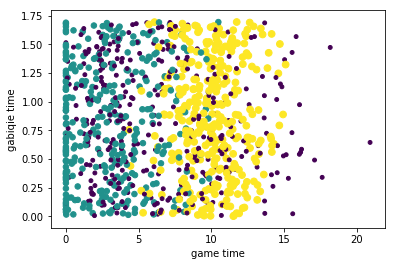

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDateMat[:,1],datingDateMat[:,2],15.0*np.array(datingLabels),15.0*np.array(datingLabels))
plt.xlabel('game time')
plt.ylabel('gabiqie time')
plt.show()

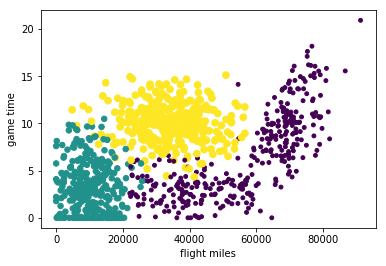

In [30]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(datingDateMat[:,0],datingDateMat[:,1],15.0*np.array(datingLabels),15.0*np.array(datingLabels))
plt.xlabel('flight miles')
plt.ylabel('game time')
plt.show()

In [31]:
def autoNorm(dataSet):
    #获取数据集每列的最小，最大值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    #获取每列的数据值范围
    diffs = maxVals - minVals
    print(diffs)

    #创建返回的归一化数据矩阵
    normDataSet = np.zeros(np.shape(dataSet))
    print(minVals)
    print(normDataSet.shape)
    #获取dataSet的行数
    m = dataSet.shape[0]

    #原始值减去最小值
    normDataSet = dataSet - np.tile(minVals,(m,1)) #将一行多列向量minVals，扩展成m行多列矩阵
    #再除以最大/最小值差，得到归一化数据
    normDataSet = normDataSet/np.tile(diffs,(m,1))

    #返回归一化数据矩阵，数据范围，最小值
    return normDataSet,diffs,minVals

In [32]:
normDataSet,diffs,minVals = autoNorm(datingDateMat)
#print(normDataSet,diffs,minVals)

[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]
(1000, 3)


In [33]:
'''
func: 分类器测试
para: 无

Returns:
    nor

'''
def datingClassTest():
    hoRatio = 0.80
    filename = 'datingTestSet2.txt'
    #从文件获取特征矩阵和分类标签向量
    datingDataMat,datingLabels = file2matrix(filename)
    #对数据做归一化，返回归一化特征矩阵，数据范围，数据最小值
    normMat,ranges,minVals = autoNorm(datingDataMat)

    #获取特征矩阵行数
    m = normMat.shape[0]
    #测试数据的个数
    numTestVecs = int(m*hoRatio)
    #分类错误级数
    errorCount =0.0

    for i in range(numTestVecs):
        #0~numTestVecs:测试集，numTestVecs~m:数据集
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print('the classifier cam back with:%d, the real answer is:%d'%(classifierResult,datingLabels[i]))
        if (classifierResult != datingLabels[i]):
            errorCount += 1.0
    print('the total error rate is:{}'.format(errorCount/float(numTestVecs)))

In [34]:
datingClassTest()

[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]
(1000, 3)
[[1.38356751e-02 1.01155013e-01 1.70444076e-02]
 [1.72331457e-01 2.97405402e-02 2.25075876e-02]
 [3.27708676e-03 8.93877645e-03 1.34994803e-01]
 [1.86179963e-01 8.89777336e-02 2.09698649e-02]
 [1.21668912e-01 9.03788217e-03 1.09563320e-02]
 [5.58976288e-03 1.18623747e-05 2.06121062e-02]
 [1.11313283e-01 1.36899040e-01 1.41990976e-04]
 [1.03755233e-03 9.96525015e-02 1.44223694e-01]
 [2.57626539e-04 4.71394742e-02 2.06781103e-03]
 [3.99053949e-02 7.60619102e-02 2.40086761e-01]
 [2.37969150e-04 5.31596753e-03 6.94663325e-03]
 [1.01194990e-01 4.93632735e-02 1.26761418e-01]
 [1.55360675e-01 4.88896762e-03 3.55195489e-03]
 [1.25311020e-01 1.00506832e-01 6.35831566e-02]
 [6.53628469e-02 1.86280854e-02 3.89761132e-02]
 [9.28829350e-02 1.45677173e-03 1.72408837e-01]
 [8.81694296e-02 2.15813183e-02 6.28134155e-02]
 [1.02884441e-02 7.21675031e-02 7.78338475e-02]
 [2.51420834e-01 1.19457863e-01 7.89482501e-02]
 [6.3

{3: 1, 2: 2}
dict_items([(3, 1), (2, 2)])
the classifier cam back with:2, the real answer is:1
[[2.55979035e-01 1.54855065e-02 6.80901273e-02]
 [7.18758987e-04 4.47471676e-04 7.86308379e-02]
 [1.09609143e-01 8.30322018e-02 5.61831124e-02]
 [1.86340730e-03 1.09586084e-02 2.08026867e-04]
 [1.56087022e-03 9.71017258e-03 6.61215904e-04]
 [2.14446122e-01 3.61622727e-02 7.50517728e-02]
 [5.21219042e-01 3.17652498e-01 1.40352881e-02]
 [1.26812553e-01 1.49010507e-02 2.60257681e-01]
 [1.63514539e-01 5.52639422e-04 3.09266720e-02]
 [3.55530685e-02 6.75441589e-03 3.84862793e-01]
 [1.39048676e-01 7.10321996e-02 2.21277596e-03]
 [4.92901745e-03 8.16272758e-04 5.09175071e-02]
 [3.41012083e-05 6.94476063e-02 3.60942611e-02]
 [5.51026403e-01 2.60749237e-01 1.46339625e-01]
 [1.75978728e-02 1.08961210e-01 4.49396899e-03]
 [4.80367619e-01 2.41616886e-02 8.11308712e-02]
 [8.35125206e-03 2.18109271e-03 1.44575204e-02]
 [8.23039172e-02 2.13673291e-01 2.20821276e-02]
 [7.91632608e-01 2.90774119e-01 2.2677557

 [5.51161184e-02 7.21883339e-02 3.35341478e-02]]
{2: 2, 1: 1}
dict_items([(2, 2), (1, 1)])
the classifier cam back with:2, the real answer is:1
[[3.10504616e-03 3.66256089e-02 1.88730513e-04]
 [2.27558047e-01 2.09616382e-03 3.28688345e-05]
 [1.41962579e-02 4.89363768e-02 2.61845634e-01]
 [2.43431687e-01 2.94536923e-02 8.35799139e-02]
 [1.68685100e-01 9.98736960e-04 6.19833989e-02]
 [1.65444199e-04 1.51847449e-02 5.22709369e-07]
 [7.38395014e-02 2.46680373e-01 2.44009866e-02]
 [8.85730657e-03 3.57237473e-02 5.54488491e-02]
 [2.10235607e-03 8.18042323e-03 9.76518780e-03]
 [6.84688615e-02 2.22375682e-02 1.19504574e-01]
 [5.97968983e-03 3.98326787e-02 5.18193414e-02]
 [1.44410492e-01 9.12175812e-03 2.50327960e-01]
 [2.07991080e-01 3.86483081e-02 7.17305259e-03]
 [8.53170125e-02 1.96868538e-01 1.16348265e-02]
 [1.00846762e-01 6.92507229e-02 1.16769718e-01]
 [5.89833170e-02 7.83276286e-03 3.13055454e-01]
 [1.28762974e-01 4.09464846e-04 1.55960386e-01]
 [2.66780522e-02 1.56270531e-01 1.791653

[[2.27484884e-01 2.36651772e-01 4.62116482e-02]
 [3.11359916e-03 1.16195339e-01 5.49621156e-02]
 [9.12539955e-02 5.45748803e-03 8.00899477e-02]
 [5.20665500e-03 2.17819412e-01 3.64756083e-03]
 [1.10626154e-04 6.94257642e-02 4.10377833e-04]
 [1.88437014e-01 2.95372674e-02 5.19766509e-02]
 [4.80200576e-01 4.06340074e-02 5.25606408e-03]
 [1.07005891e-01 2.34350642e-01 2.15465544e-01]
 [1.40909661e-01 1.48638150e-01 1.68708678e-02]
 [2.54610723e-02 1.97325326e-01 3.29936744e-01]
 [1.18268832e-01 9.12201379e-03 1.14115663e-06]
 [1.69884177e-03 1.52567101e-01 7.37779583e-02]
 [1.21309945e-03 9.70200632e-03 2.07397424e-02]
 [5.08827668e-01 2.20843999e-02 1.13280524e-01]
 [1.07468512e-02 1.01985518e-03 1.27710284e-02]
 [4.41022999e-01 4.26784344e-02 1.09433084e-01]
 [3.89316496e-03 9.94303162e-02 2.76262071e-02]
 [6.65106768e-02 1.00440852e-02 3.78584450e-02]
 [7.40886135e-01 3.14022687e-02 3.86368549e-02]
 [1.47811028e-01 9.16592150e-04 5.81171334e-02]
 [3.06066923e-02 2.07660820e-01 3.437785

{1: 3}
dict_items([(1, 3)])
the classifier cam back with:1, the real answer is:1
[[1.45829546e-01 1.09160088e-01 1.82061891e-01]
 [2.27638810e-02 3.41508687e-02 1.99057111e-01]
 [4.28512181e-02 6.75684403e-03 5.08133886e-03]
 [2.79673981e-02 9.64949949e-02 2.28986879e-02]
 [7.15031044e-03 1.15375214e-02 3.66570769e-02]
 [1.14931794e-01 2.49300670e-04 1.93337890e-01]
 [3.57469649e-01 1.27916115e-01 8.07792359e-02]
 [5.38426281e-02 1.07599038e-01 4.56841927e-01]
 [7.85691839e-02 5.26525098e-02 1.16694706e-01]
 [4.15868346e-03 8.30236893e-02 6.17983662e-01]
 [6.19138576e-02 3.66819234e-03 4.52780577e-02]
 [2.90094235e-03 5.50012957e-02 3.58834770e-03]
 [1.68758241e-02 3.31500437e-03 1.26544657e-01]
 [3.82225852e-01 9.28317593e-02 3.00621799e-01]
 [7.37814990e-05 1.54106567e-02 9.74350397e-03]
 [3.23781735e-01 2.55153866e-03 1.41820835e-02]
 [1.06812445e-03 2.53608468e-02 2.07087168e-03]
 [2.65101032e-02 6.56871380e-02 2.93974919e-04]
 [5.86250584e-01 1.11076685e-01 2.29691181e-04]
 [8.374

 [1.45027345e-01 3.17300476e-02 5.31568216e-01]]
{2: 3}
dict_items([(2, 3)])
the classifier cam back with:2, the real answer is:2
[[1.91138517e-01 3.48706808e-02 1.14903643e-01]
 [9.13161334e-03 1.69271586e-03 1.02082385e-01]
 [6.88133151e-02 5.10113541e-02 7.00476965e-01]
 [1.25254141e-02 2.78821624e-02 3.77411651e-01]
 [8.55091318e-04 1.31363140e-03 3.29706937e-01]
 [1.55498896e-01 1.63501360e-02 1.06249571e-01]
 [4.26677059e-01 2.51312251e-01 2.31788929e-01]
 [8.25744518e-02 3.39908273e-02 8.05698015e-03]
 [1.12640459e-01 7.36240171e-03 1.79823017e-01]
 [1.43533384e-02 2.08748773e-02 4.18524033e-04]
 [9.25026710e-02 4.17068344e-02 3.05670871e-01]
 [2.12333555e-06 8.25674666e-03 6.81556459e-01]
 [5.56358136e-03 4.04947134e-02 1.68042893e-01]
 [4.53685407e-01 2.01008716e-01 4.72504224e-02]
 [4.08412760e-03 7.17150052e-02 4.44825397e-01]
 [3.89795171e-01 8.67583285e-03 7.82782672e-01]
 [5.12360905e-04 2.43172347e-04 5.18622760e-01]
 [4.75836628e-02 1.59961546e-01 5.60275921e-01]
 [6.74

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[4.26390842e-05 9.27874589e-04 1.72640252e-01]
 [2.90826423e-01 1.32556692e-02 1.89199823e-01]
 [3.29062692e-02 1.46025498e-01 6.80140295e-03]
 [3.08736665e-01 1.14567724e-04 1.96381029e-02]
 [2.23696571e-01 3.70639307e-02 3.24984523e-02]
 [2.43940081e-03 8.07375546e-02 1.83625053e-01]
 [4.38824761e-02 4.32419911e-01 7.45452572e-02]
 [2.44503468e-02 7.89054778e-04 4.41844327e-01]
 [1.16865307e-02 4.96622623e-03 1.09176689e-01]
 [1.04923101e-01 1.39109935e-04 6.00520009e-01]
 [1.94829271e-02 1.29959102e-01 4.06422798e-02]
 [1.95599751e-01 4.27837043e-03 5.05377774e-03]
 [2.68648565e-01 1.27812598e-01 1.18710602e-01]
 [5.28254872e-02 3.65560327e-01 2.88479394e-01]
 [1.44260645e-01 1.79837460e-01 7.66011459e-03]
 [3.26206982e-02 6.22103596e-02 1.69717480e-02]
 [1.77315426e-01 1.97914002e-02 1.17784338e-03]
 [5.08894834e-02 3.09389394e-01 3.55047771e-05]
 [1.42327985e-01 4.00960596e-01 1.57486567e-05]
 [9.80528053e-03 2.36471073e-01 1.95015868e-01]
 [9.51944205e-02 9.57743161e-08 2.285655

 [2.65387583e-03 9.89145419e-02 3.26364512e-03]]
{1: 3}
dict_items([(1, 3)])
the classifier cam back with:1, the real answer is:1
[[2.56256701e-02 9.14360711e-02 2.51085064e-01]
 [1.38885306e-01 2.45830032e-02 2.70977453e-01]
 [2.18767542e-04 1.21462183e-02 9.69243807e-06]
 [1.51344893e-01 7.98777820e-02 5.09494745e-02]
 [9.38537894e-02 6.30483589e-03 7.06800284e-02]
 [1.37404743e-02 1.49343069e-04 2.64297602e-01]
 [1.41444821e-01 1.48736322e-01 1.28603757e-01]
 [1.04939399e-04 9.00078388e-02 5.62946496e-01]
 [3.42292878e-03 4.05827023e-02 1.73058369e-01]
 [2.47458996e-02 6.76668147e-02 7.40488040e-01]
 [7.30556229e-04 7.84561245e-03 8.24741856e-02]
 [7.59865318e-02 4.26479051e-02 2.10074867e-04]
 [1.23695093e-01 7.32495191e-03 1.85010041e-01]
 [1.57171031e-01 1.10684569e-01 3.87738682e-01]
 [4.54570262e-02 2.31494778e-02 2.99656759e-02]
 [1.20563166e-01 5.06380468e-04 1.99735472e-03]
 [6.47592170e-02 1.72242091e-02 1.43768756e-02]
 [3.47827655e-03 8.08292646e-02 8.38002478e-03]
 [2.95

In [17]:
def img2vector(filename):
    returnVect = np.zeros((1, 1024))
    fr = open(filename)
    for i in range(32):
        linrStr = fr.readline()
        for j in range(32):
            returnVect[0, 32 * i + j] = int(linrStr[j])

    return returnVect

In [18]:
def handwritingClassTest():
    hwLabels = []
    #获取目录内容
    dirName = './digits/trainingDigits/'
    trainingFileList = listdir(dirName)
    print(trainingFileList)
    m = len(trainingFileList)
    trainingMat = np.zeros((m,1024))

    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNmuStr = int(fileStr.split('_')[0])
        hwLabels.append(classNmuStr)
        trainingMat[i,:] = img2vector(dirName+'/'+fileNameStr)
    dirName = 'digits/testDigits'
    testFileList = listdir(dirName)
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector(dirName+'/'+fileNameStr)
        classifierResult = classify0(vectorUnderTest,trainingMat,hwLabels,3)
        print('the classifier came back with:%d,the real answer is:%d'%(classifierResult,classNumStr))
        if (classifierResult != classNumStr):
            errorCount += 1.0

    print('\nthe total number of errors is:%d'%errorCount)
    print('\nthe total error rate is:%f'%(errorCount/float(mTest)))



In [19]:
if __name__ == '__main__':
    #filename = 'datingTestSet2.txt'
    #datingDataMat,datingLabels = file2matrix(filename)
    #normDataSet, ranges, minVals = autoNorm(datingDataMat)
    #print(datingDataMat)
    #print(normDataSet)
    #print(datingLabels)

    #handwrite
    #testVector = img2vector('digits/trainingDigits/0_13.txt')
    #print(testVector)
    handwritingClassTest()

['1_32.txt', '1_179.txt', '2_71.txt', '2_91.txt', '3_188.txt', '1_59.txt', '4_163.txt', '7_77.txt', '6_113.txt', '6_159.txt', '4_149.txt', '1_26.txt', '5_55.txt', '1_163.txt', '7_81.txt', '8_145.txt', '4_10.txt', '5_56.txt', '1_41.txt', '7_144.txt', '9_119.txt', '6_38.txt', '3_185.txt', '6_176.txt', '2_175.txt', '7_10.txt', '9_84.txt', '6_114.txt', '3_186.txt', '6_111.txt', '9_31.txt', '5_1.txt', '1_176.txt', '4_151.txt', '4_159.txt', '3_3.txt', '4_70.txt', '7_182.txt', '5_102.txt', '7_142.txt', '3_133.txt', '9_144.txt', '9_74.txt', '6_156.txt', '8_51.txt', '8_122.txt', '8_30.txt', '7_121.txt', '7_100.txt', '5_34.txt', '5_164.txt', '9_107.txt', '9_73.txt', '6_35.txt', '1_45.txt', '2_80.txt', '4_177.txt', '6_36.txt', '1_165.txt', '6_192.txt', '3_172.txt', '5_73.txt', '9_90.txt', '4_29.txt', '3_13.txt', '9_124.txt', '9_200.txt', '9_1.txt', '6_43.txt', '7_42.txt', '1_42.txt', '2_93.txt', '4_179.txt', '4_86.txt', '0_151.txt', '7_180.txt', '4_61.txt', '1_130.txt', '4_0.txt', '0_143.txt', '3

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
{1: 3}
dict_items([(1, 3)])
the classifier came back with:1,the real answer is:1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{2: 3}
dict_items([(2, 3)])
the classifier came back with:2,the real answer is:2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{2: 3}
dict_items([(2, 3)])
the classifier came back with:2,the real answer is:2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{1: 3}
dict_items([(1, 3)])
the classifier came back with:1,the real answer is:1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{8: 3}
dict_items([(8, 3)])
the classifier came back with:8,the real answer is:8
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{8: 3}
dict_items([(8, 3)])
the classifier came back with:8,the real answer is:8
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{4: 3}
dict_items([(4, 3)])
the classifier came back with:4,the real answer is:4
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{3: 3}
dict_items([(3, 3)])
the classifier came back with:3,the real answer is:8
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{7: 3}
dict_items([(7, 3)])
the classifier came back with:7,the real answer is:7
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{1: 3}
dict_items([(1, 3)])
the classifier came back with:1,the real answer is:1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{9: 3}
dict_items([(9, 3)])
the classifier came back with:9,the real answer is:9
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{6: 3}
dict_items([(6, 3)])
the classifier came back with:6,the real answer is:6
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{6: 3}
dict_items([(6, 3)])
the classifier came back with:6,the real answer is:6
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{7: 3}
dict_items([(7, 3)])
the classifier came back with:7,the real answer is:7
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{7: 3}
dict_items([(7, 3)])
the classifier came back with:7,the real answer is:7
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{4: 3}
dict_items([(4, 3)])
the classifier came back with:4,the real answer is:4
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{6: 3}
dict_items([(6, 3)])
the classifier came back with:6,the real answer is:6
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{3: 3}
dict_items([(3, 3)])
the classifier came back with:3,the real answer is:3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{7: 3}
dict_items([(7, 3)])
the classifier came back with:7,the real answer is:7
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{5: 3}
dict_items([(5, 3)])
the classifier came back with:5,the real answer is:5
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{5: 3}
dict_items([(5, 3)])
the classifier came back with:5,the real answer is:5
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{1: 3}
dict_items([(1, 3)])
the classifier came back with:1,the real answer is:1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{7: 3}
dict_items([(7, 3)])
the classifier came back with:7,the real answer is:7
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{7: 3}
dict_items([(7, 3)])
the classifier came back with:7,the real answer is:7
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{6: 3}
dict_items([(6, 3)])
the classifier came back with:6,the real answer is:6
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{8: 2, 1: 1}
dict_items([(8, 2), (1, 1)])
the classifier came back with:8,the real answer is:8
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{4: 2, 0: 1}
dict_items([(4, 2), (0, 1)])
the classifier came back with:4,the real answer is:4
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{2: 3}
dict_items([(2, 3)])
the classifier came back with:2,the real answer is:2
[[0. 0. 0. ... 0. 0. 0.]

{8: 3}
dict_items([(8, 3)])
the classifier came back with:8,the real answer is:8
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{0: 3}
dict_items([(0, 3)])
the classifier came back with:0,the real answer is:0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{3: 3}
dict_items([(3, 3)])
the classifier came back with:3,the real answer is:3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{4: 3}
dict_items([(4, 3)])
the classifier came back with:4,the real answer is:4
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{6: 3}
dict_items([(6, 3)])
the classifier came back

{4: 3}
dict_items([(4, 3)])
the classifier came back with:4,the real answer is:4
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{1: 3}
dict_items([(1, 3)])
the classifier came back with:1,the real answer is:1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{5: 3}
dict_items([(5, 3)])
the classifier came back with:5,the real answer is:5
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{0: 3}
dict_items([(0, 3)])
the classifier came back with:0,the real answer is:0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{2: 3}
dict_items([(2, 3)])
the classifier came back

{6: 3}
dict_items([(6, 3)])
the classifier came back with:6,the real answer is:6
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{7: 3}
dict_items([(7, 3)])
the classifier came back with:7,the real answer is:7
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{0: 3}
dict_items([(0, 3)])
the classifier came back with:0,the real answer is:0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{8: 3}
dict_items([(8, 3)])
the classifier came back with:8,the real answer is:8
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{3: 3}
dict_items([(3, 3)])
the classifier came back

{6: 3}
dict_items([(6, 3)])
the classifier came back with:6,the real answer is:6
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{2: 3}
dict_items([(2, 3)])
the classifier came back with:2,the real answer is:2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{0: 3}
dict_items([(0, 3)])
the classifier came back with:0,the real answer is:0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{1: 3}
dict_items([(1, 3)])
the classifier came back with:1,the real answer is:1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{7: 3}
dict_items([(7, 3)])
the classifier came back

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{1: 3}
dict_items([(1, 3)])
the classifier came back with:1,the real answer is:1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{7: 3}
dict_items([(7, 3)])
the classifier came back with:7,the real answer is:7
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{5: 3}
dict_items([(5, 3)])
the classifier came back with:5,the real answer is:5
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{1: 3}
dict_items([(1, 3)])
the classifier came back with:1,the real answer is:1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{1: 3}
dict_items([(1, 3)])
the classifier came back with:1,the real answer is:1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{3: 3}
dict_items([(3, 3)])
the classifier came back with:3,the real answer is:3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{7: 3}
dict_items([(7, 3)])
the classifier came back with:7,the real answer is:7
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{4: 3}
dict_items([(4, 3)])
the classifier came back with:4,the real answer is:4
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{7: 3}
dict_items([(7, 3)])
the classifier came back with:7,the real answer is:7
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{8: 2, 5: 1}
dict_items([(8, 2), (5, 1)])
the classifier came back with:8,the real answer is:8
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{2: 3}
dict_items([(2, 3)])
the classifier came back with:2,the real answer is:2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{3: 3}
dict_items([(3, 3)])
the classifier came back with:3,the real answer is:3
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ..

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{5: 3}
dict_items([(5, 3)])
the classifier came back with:5,the real answer is:5
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{4: 3}
dict_items([(4, 3)])
the classifier came back with:4,the real answer is:4
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{5: 3}
dict_items([(5, 3)])
the classifier came back with:5,the real answer is:5
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{8: 3}
dict_items([(8, 3)])
the classifier came back with:8,the real answer is:8
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{9: 1, 1: 2}
dict_items([(9, 1), (1, 2)])
the classifier came back with:1,the real answer is:9
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{2: 3}
dict_items([(2, 3)])
the classifier came back with:2,the real answer is:2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{5: 3}
dict_items([(5, 3)])
the classifier came back with:5,the real answer is:5
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{8: 3}
dict_items([(8, 3)])
the classifier came back with:8,the real answer is:8
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ..

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{9: 3}
dict_items([(9, 3)])
the classifier came back with:9,the real answer is:9
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{2: 3}
dict_items([(2, 3)])
the classifier came back with:2,the real answer is:2
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{1: 3}
dict_items([(1, 3)])
the classifier came back with:1,the real answer is:1
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{6: 3}
dict_items([(6, 3)])
the classifier came back with:6,the real answer is:6
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [

{4: 3}
dict_items([(4, 3)])
the classifier came back with:4,the real answer is:4
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{7: 3}
dict_items([(7, 3)])
the classifier came back with:7,the real answer is:7
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{6: 3}
dict_items([(6, 3)])
the classifier came back with:6,the real answer is:6
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{8: 3}
dict_items([(8, 3)])
the classifier came back with:8,the real answer is:8
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{0: 3}
dict_items([(0, 3)])
the classifier came back

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
{2: 3}
dict_items([(2, 3)])
the classifier came back with:2,the real answer is:2

the total number of errors is:12

the total error rate is:0.012685
